In [1]:
!python --version


Python 3.11.1


In [2]:
pip install pandas numpy matplotlib seaborn jupyter


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#Load Dataset
df_chn = pd.read_csv('C:\\Users\\Asus\\Documents\\Collage\\Tel-U\\UKM\\UKM Aktif 2024\\GDGOC Member 2024\\Feature Engineering & Data Preprocessing\\AUC.csv')

df_chn.head(11)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [3]:
df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [4]:
#Remove Unnecessary Columns (language)
cols_to_remove = ['language']
df_chn.drop(cols_to_remove, axis=1, inplace=True)

df_chn.head()

,name,author,narrator,time,releasedate,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,4.5 out of 5 stars181 ratings,820.00


In [8]:
# mengubah format numerik 'times' ke 'timeminute'
import re

# Fungsi untuk mengonversi waktu ke menit
def convert_time_to_minutes(time_str):
    if isinstance(time_str, str):  # Pastikan nilai adalah string(object)
        hours = 0
        minutes = 0
        
        # Mengambil jam (jika ada)
        match = re.search(r'(\d+)\s*hrs?', time_str)
        if match:
            hours = int(match.group(1))
        
        # Mengambil menit (jika ada)
        match = re.search(r'(\d+)\s*mins?', time_str)
        if match:
            minutes = int(match.group(1))
        
        return hours * 60 + minutes
    return 0  # Jika bukan string atau tidak sesuai format, dianggap 0 menit

# Terapkan fungsi ke kolom `time`
df_chn['time'] = df_chn['time'].apply(convert_time_to_minutes)

# Hapus kolom asli `time`
#df_chn.drop(columns=['time'], inplace=True)

# Print hasil akhir
print(df_chn[['time_minute']].head())


KeyError: "None of [Index(['time_minute'], dtype='object')] are in the [columns]"

In [5]:
# Konversi `releasedate` ke format datetime
df_chn['releasedate'] = pd.to_datetime(df_chn['releasedate'], errors='coerce', dayfirst=True)

# Ekstrak informasi tahun, bulan, dan hari 
df_chn['release_year'] = df_chn['releasedate'].dt.year
df_chn['release_month'] = df_chn['releasedate'].dt.month
df_chn['release_day'] = df_chn['releasedate'].dt.day

# Hapus kolom `releasedate` 
df_chn.drop(columns=['releasedate'], inplace=True)

# Cek hasil akhir
print(df_chn[['release_year', 'release_month', 'release_day']].head())


   release_year  release_month  release_day
0          2008              8            4
1          2018              5            1
2          2020             11            6
3          2021             10            5
4          2010              1           13


In [6]:
# ubah rating dari teks (object) lalu  ubah ke float
df_chn['stars'] = df_chn['stars'].str.extract(r'([\d.]+)').astype(float)

# Cek hasil akhir
print(df_chn[['stars']].head())


   stars
0    5.0
1    4.5
2    4.5
3    4.5
4    4.5


In [7]:
df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           87489 non-null  object 
 1   author         87489 non-null  object 
 2   narrator       87489 non-null  object 
 3   time           87489 non-null  object 
 4   stars          15072 non-null  float64
 5   price          87489 non-null  object 
 6   release_year   87489 non-null  int32  
 7   release_month  87489 non-null  int32  
 8   release_day    87489 non-null  int32  
dtypes: float64(1), int32(3), object(5)
memory usage: 5.0+ MB


In [15]:
# ubah price menjadi int/float 

# Pastikan kolom 'price' menjadi float
df_chn['price'] = pd.to_numeric(df_chn['price'], errors='coerce')

# Cek hasil
print(df_chn[['price']].head())


   price
0  468.0
1  820.0
2  410.0
3  615.0
4  820.0


In [16]:
df_chn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87451 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           87451 non-null  object 
 1   author         87451 non-null  object 
 2   narrator       87451 non-null  object 
 3   time           87451 non-null  int64  
 4   stars          15034 non-null  float64
 5   price          77982 non-null  float64
 6   release_year   87451 non-null  int32  
 7   release_month  87451 non-null  int32  
 8   release_day    87451 non-null  int32  
dtypes: float64(2), int32(3), int64(1), object(3)
memory usage: 5.7+ MB


In [9]:
df_chn.head()

,name,author,narrator,time,stars,price,release_year,release_month,release_day
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,140,5.0,468.00,2008,8,4
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,788,4.5,820.00,2018,5,1
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,123,4.5,410.00,2020,11,6
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,676,4.5,615.00,2021,10,5
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,600,4.5,820.00,2010,1,13


In [10]:
# cheking duplicated values
df_chn.duplicated().sum()

np.int64(38)

In [11]:
# handling duplicated values
df_chn.drop_duplicates(inplace=True)
df_chn.duplicated().sum()

np.int64(0)

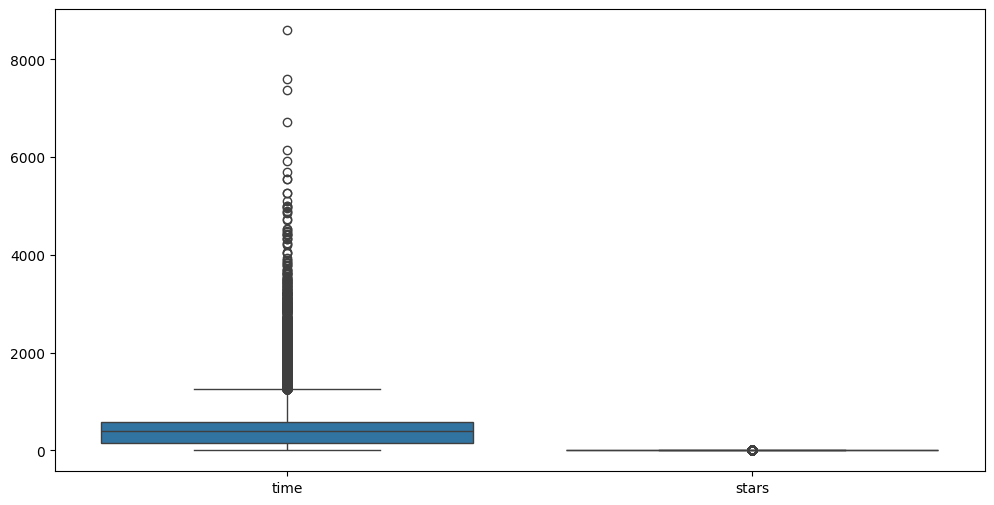

In [13]:
# visualize numerical columns with boxplot

num_cols = ['time', 'stars', 'price']

# ubah ke grafik
plt.figure(figsize=(12,6))
sns.boxplot(data=df_chn[num_cols])
plt.show()

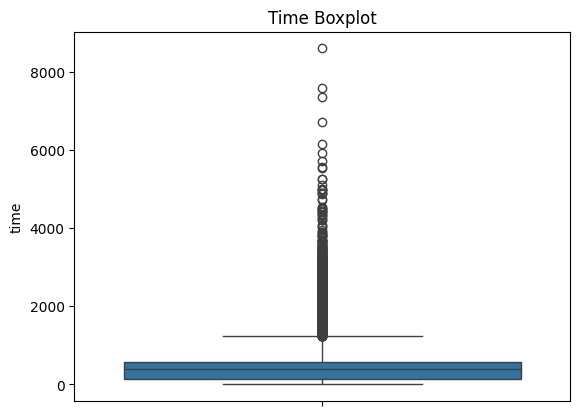

In [18]:
sns.boxplot(data=df_chn['time'])
plt.title('Time Boxplot')
plt.show()


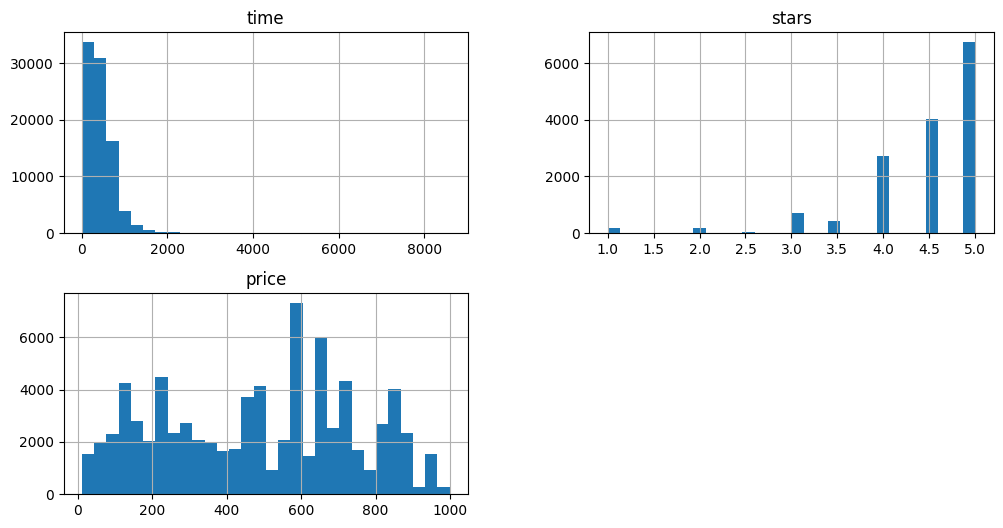

In [21]:
# Visualize numerical columns with Histogram Plot
df_chn[num_cols].hist(bins=30, figsize=(12,6))
plt.show()

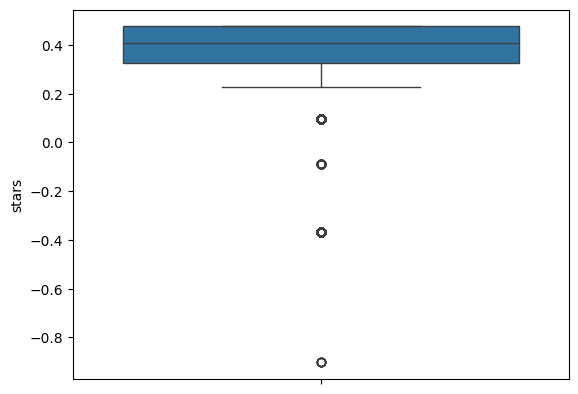

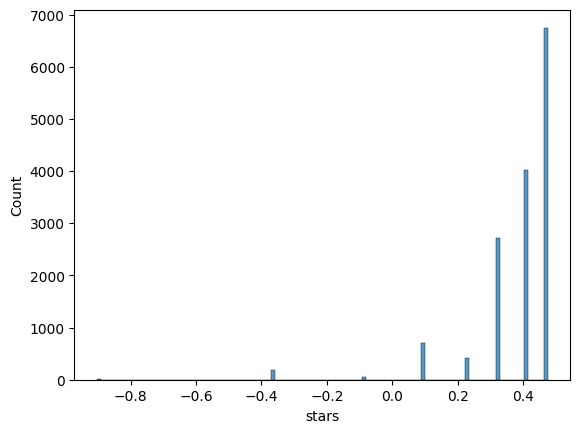

In [23]:
# Reducing Outliers by Log-transofrming 'Stars' column
df_chn['stars'] = np.log(df_chn['stars'])

sns.boxplot(df_chn['stars'])
plt.show()

sns.histplot(df_chn['stars'])
plt.show()

In [25]:
# Split data into train & test to avoid data leakage
# Split data into training and testing sets

X = df_chn.drop('time', axis=1)
y = df_chn['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((69960, 8), (17491, 8), (69960,), (17491,))

In [33]:
df_chn.isna().sum()

name                 0
author               0
narrator             0
time                 0
stars            72417
price             9469
release_year         0
release_month        0
release_day          0
dtype: int64

In [30]:
X_train[num_cols].hist(bins = 20, figsize = (12,6))
plt.show()

KeyError: "['time'] not in index"

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
    
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train[num_cols].hist(bins=20, figsize = (12,6))
plt.show()


KeyError: "['time'] not in index"